# WeRateDogs Data Wrangling

## Project background

### The data

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced."

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

### Key Points

Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.

Cleaning includes merging individual pieces of data according to the rules of tidy data.

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


### Reporting for this Project

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

Create a 300-600 word written report called wrangle_report.pdf that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.

## Gathering the data

In [7]:
# library import
import pandas as pd
import numpy as np
import requests 
import os
import tweepy
import json
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# csv import
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# image predictions import via programmed download

url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)

df_images = pd.read_csv ('image-predictions.tsv', '\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
# setting up the twitter API

auth = tweepy.OAuthHandler(mine, mine)
auth.set_access_token(mine, mine)

api = tweepy.API(auth)

In [5]:
# collect full JSON data and convert into .txt

tweets_full = []
id_list = df_archive['tweet_id']

for case in id_list:
    try:
        # getting the status per id
        tweet = api.get_status(case)
        # Append to list of dictionaries
        tweets_full.append(tweet)
    except Exception as e:
        tweets_full.append(tweet)

In [6]:
len(tweets_full)

2356

In [8]:
# json, source: https://drive.google.com/file/d/0Bw1LIIbSl0xuNnJ0N1ppSkRjQjQ/view

file = open('tweet_json.txt', 'w') 
for status in tweets_full:
    json.dump(status._json, file, separators = (', ', ': '))

In [12]:
# tweet ID, retweet count and favorite ("like") count import with API

tweets_details = []
tweets_no_status = []
id_list = df_archive['tweet_id']

for case in id_list:
    try:
        # getting the status per id
        tweet = api.get_status(case)
        # retweets
        retweets = tweet.retweet_count
        # like count
        like_count = tweet.favorite_count
        # Append to list of dictionaries
        tweets_details.append({'tweet_id': case, 
                               'retweets': retweets, 
                               'likes': like_count})
    except Exception as e:
        tweets_no_status.append({'tweet_id': case})

In [13]:
len(tweets_details)

899

In [14]:
len(tweets_no_status)

1457

In [15]:
# merging the two Twitter real-time datasets

df_details = pd.DataFrame(tweets_details, 
                          columns = ['tweet_id', 
                                     'retweets', 
                                     'likes'])

df_no_status = pd.DataFrame(tweets_no_status, columns = ['tweet_id'])

frames = [df_details, df_no_status]

df_api = pd.concat(frames)

df_api.tail()

,likes,retweets,tweet_id
1452,NaN,NaN,666049248165822465
1453,NaN,NaN,666044226329800704
1454,NaN,NaN,666033412701032449
1455,NaN,NaN,666029285002620928
1456,NaN,NaN,666020888022790149


## Assessing the data

In [18]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_api.head()

,likes,retweets,tweet_id
0,3166.0,584.0,832645525019123713
1,6191.0,1115.0,817415592588222464
2,0.0,9758.0,817181837579653120
3,9600.0,2298.0,817171292965273600
4,13257.0,2981.0,817120970343411712


In [23]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 1456
Data columns (total 3 columns):
likes       899 non-null float64
retweets    899 non-null float64
tweet_id    2356 non-null int64
dtypes: float64(2), int64(1)
memory usage: 73.6 KB


### Quality

##### `archive` table
- we have 2,356 entries instead of the mentioned 5,000+
- missing values 'None' for doggo, floofer, pupper, puppo
- timestamp and retweeted_status_timestamp are not datetime objects
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are floats, not integers
- rating_numerator has a very high max at 1,776, while quartiles are within 10-12
- rating_denominator has a very high max at 170, while quartiles are all at 10
- minimums for rating_numerator and rating_denominator are at 0. For denominator, this is impossible

##### `images` table
- dog names in p1, p2, p3 have different format (upper vs. lower case)

##### `api data` table
- likes and retweets are formatted as floats due to pandas import


### Tidiness

##### `archive` table
- dog stages are in four columns (doggo, floofer, pupper, puppo) instead of one (dog stage)

##### overall
- we now have information about three things for the same twitter ids in three tables. It makes sense to merge the archive and the api data to evaluate tweet performance, we'll keep the image one separate as this is for image recognition purposes.

## Cleaning the data

In [24]:
# copying datasets

df_archive_copy = df_archive
df_images_copy = df_images
df_api_copy = df_api

### Missing values

#### `archive` We have 2,356 entries instead of the mentioned 5,000+

##### Define
 
This is probably due to retweets that are included in the same rows as the original tweets. We're supposed to focus on the original tweets. 

No action required.

#### `archive` Missing values 'None' for doggo, floofer, pupper, puppo

##### Define
 
We need to clearly point out missing values as NaN.

##### Code

In [25]:
df_archive.replace(to_replace='None', value=np.nan, inplace = True)

##### Test

In [26]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Tidiness

#### `archive` Dog stages are in four columns (doggo, floofer, pupper, puppo) instead of one (dog stage)

##### Define
 
Dog stages need to be merged in one column `dog_stage` with respective values doggo, floofer, pupper, puppo and NaN for missing values.

##### Code

In [27]:
# source https://stackoverflow.com/questions/19226488/python-pandas-change-one-value-based-on-another-value
df_archive['dog_stage'] = np.nan
df_archive['dog_stage'][df_archive['doggo'] == 'doggo'] = 'doggo'
df_archive['dog_stage'][df_archive['floofer'] == 'floofer'] = 'floofer'
df_archive['dog_stage'][df_archive['pupper'] == 'pupper'] = 'pupper'
df_archive['dog_stage'][df_archive['puppo'] == 'puppo'] = 'puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

In [28]:
df_archive['dog_stage'].value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [29]:
df_archive = df_archive.drop('doggo', axis=1)
df_archive = df_archive.drop('floofer', axis=1)
df_archive = df_archive.drop('pupper', axis=1)
df_archive = df_archive.drop('puppo', axis=1)

##### Test

In [30]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Merger of  `archive`  and `api` datasets

##### Define
 
`archive` and `api data` datasets will be merged to enable the comprehensive analysis of tweet performance.

##### Code

In [31]:
df_tweets = pd.merge(df_archive, df_api,
                            on=['tweet_id'], how='left')

##### Test

In [32]:
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN


In [33]:
df_tweets['likes'].describe()

count       899.000000
mean       8039.945495
std        9994.799957
min           0.000000
25%        3226.000000
50%        5572.000000
75%        9674.000000
max      129854.000000
Name: likes, dtype: float64

In [34]:
df_tweets['retweets'].describe()

count      899.000000
mean      3630.982202
std       5589.439058
min          2.000000
25%       1201.500000
50%       2141.000000
75%       3900.000000
max      78601.000000
Name: retweets, dtype: float64

### Quality

#### `archive` timestamp and retweeted_status_timestamp are not datetime objects

##### Define
 
For easier computation, these variables will be transformed into datetime objects.

##### Code

In [35]:
df_tweets['timestamp'] = pd.to_datetime(df_tweets['timestamp'])
df_tweets['retweeted_status_timestamp'] = pd.to_datetime(df_tweets['retweeted_status_timestamp'])

##### Test

In [36]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
likes                         899 non-null float64
retweets                      899 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory us

#### `archive` in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are floats, not integers

##### Define
 
For better look & feel, these variables will be transformed into integers.

##### Code

In [37]:
df_tweets['in_reply_to_status_id'].fillna(0, inplace = True)
df_tweets['in_reply_to_user_id'].fillna(0, inplace = True)
df_tweets['retweeted_status_id'].fillna(0, inplace = True)
df_tweets['retweeted_status_user_id'].fillna(0, inplace = True)


df_tweets['in_reply_to_status_id'] = df_tweets['in_reply_to_status_id'].astype(int, inplace = True)
df_tweets['in_reply_to_user_id'] = df_tweets['in_reply_to_user_id'].astype(int, inplace = True)
df_tweets['retweeted_status_id'] = df_tweets['retweeted_status_id'].astype(int, inplace = True)
df_tweets['retweeted_status_user_id'] = df_tweets['retweeted_status_user_id'].astype(int, inplace = True)

df_tweets['in_reply_to_status_id'].fillna(np.nan, inplace = True)
df_tweets['in_reply_to_user_id'].fillna(np.nan, inplace = True)
df_tweets['retweeted_status_id'].fillna(np.nan, inplace = True)
df_tweets['retweeted_status_user_id'].fillna(np.nan, inplace = True)

##### Test

In [38]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
likes                         899 non-null float64
retweets                      899 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(7), object(5)
memory usag

#### `archive` rating_numerator has a very high max at 1,776, while quartiles are within 10-12; minimums are very low

##### Define
 
This needs to be further explored to capture low quality data entries, e.g. via visualizations. The low minimums will also be part of this wrangling exercise.

##### Code

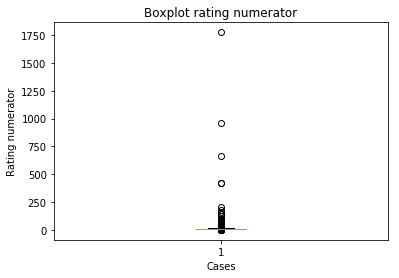

In [40]:
#boxplot
plt.boxplot(df_tweets['rating_numerator'])
plt.title('Boxplot rating numerator')
plt.xlabel('Cases')
plt.ylabel('Rating numerator');

##### Test

In [41]:
df_tweets['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

#### `archive` rating_denominator has a very high max at 170, while quartiles are all at 10; minimums are very low

##### Define
 
This needs to be further explored to capture low quality data entries, e.g. via visualizations. The low minimums will also be part of this wrangling exercise.

##### Code

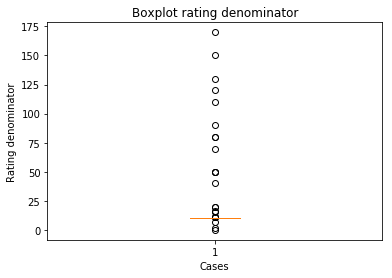

In [43]:
#boxplot
plt.boxplot(df_tweets['rating_denominator'])
plt.title('Boxplot rating denominator')
plt.xlabel('Cases')
plt.ylabel('Rating denominator');

##### Test

In [44]:
df_tweets['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### `api data` likes and retweets are formatted as floats due to pandas import

##### Define
 
For better look & feel, these variables will be transformed into integers.

##### Code

In [45]:
df_tweets['likes'].fillna(0, inplace = True)
df_tweets['retweets'].fillna(0, inplace = True)

df_tweets['likes'] = df_tweets['likes'].astype(int)
df_tweets['retweets'] = df_tweets['retweets'].astype(int)

df_tweets['likes'].fillna(np.nan, inplace = True)
df_tweets['retweets'].fillna(np.nan, inplace = True)

##### Test

In [46]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
likes                         2356 non-null int64
retweets                      2356 non-null int64
dtypes: datetime64[ns](2), int64(9), object(5)
memory usage: 312.9+ KB


## Insights

1. The dataset is not containing 5,000+ original tweets, many retweeted items are covered in our dataset with 2,356 cases.
2. The dog stages doggo, floofer, pupper, puppo have not been comprehensively applied to the `archive` dataset, in sum only 380 out of 2,356 data row include these dog stage values.  
3. We experience some odd outliers for the `rating_numerator` and the `rating_denominator`, as shown in the visualizations below, these need to be considered in the explanatory data analysis.


## Visualization

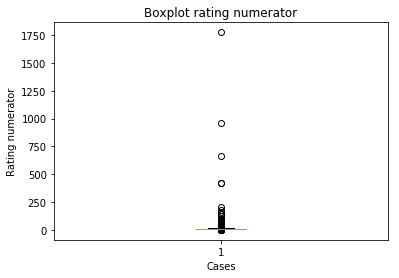

In [47]:
plt.boxplot(df_tweets['rating_numerator'])
plt.title('Boxplot rating numerator')
plt.xlabel('Cases')
plt.ylabel('Rating numerator');

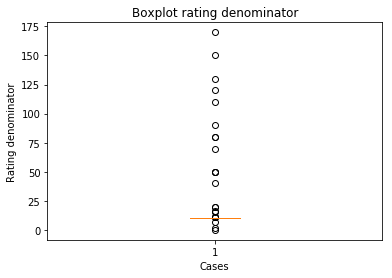

In [48]:
plt.boxplot(df_tweets['rating_denominator'])
plt.title('Boxplot rating denominator')
plt.xlabel('Cases')
plt.ylabel('Rating denominator');

The boxplots for both variables show that we have highly skewed distributions towards the top quartile. For the `rating_denominator`, 10 is the magic line where many things meet. In the explanatory data analysis, a closer look at this is required to figure out how to deal with these outliers, e.g. using plots from the matplotlib.

## Saving the final dataset

In [49]:
df_tweets.to_csv('twitter_archive_master.csv')